# WARNING: This file is a work in progress and its results should not be trusted!

In [2]:
import pandas

import swasputils

In [3]:
classifications = swasputils.ZooniverseClassifications()

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\anm83\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
def calc_consensus(series):
    nvalues = len([v for v in series.values if v > 0])
    sum_values = sum(series.values)
    return max([v/sum_values for v in series.values])/nvalues

In [5]:
SKIP_WORKFLOWS = {5214,17339}
workflow_consensus = {}
for workflow_id, workflow_classifications in classifications.workflows.items():
    if workflow_id in SKIP_WORKFLOWS:
        continue
    workflow_counts = workflow_classifications.count_annotations()
    workflow_consensus[workflow_id] = {
        'Classification Count': workflow_counts.apply(sum, 'columns'),
        'Consensus': workflow_counts.apply(calc_consensus, 'columns')
    }

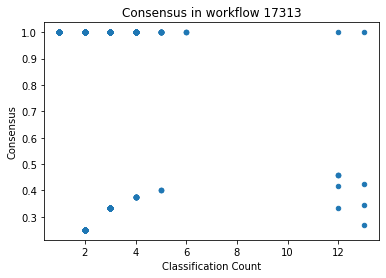

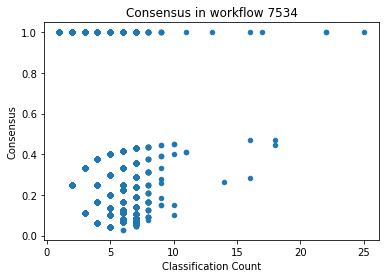

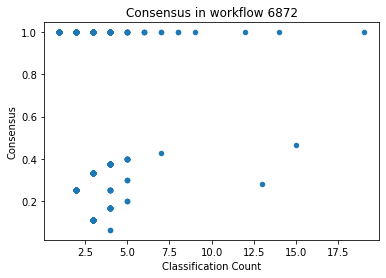

In [9]:
for workflow_id, consensus in workflow_consensus.items():
    pandas.DataFrame(consensus).plot.scatter(
        title='Consensus in workflow {}'.format(workflow_id),
        x='Classification Count',
        y='Consensus',
    )

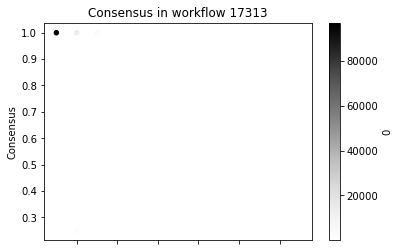

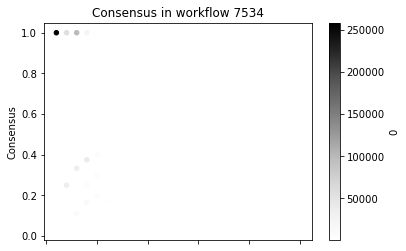

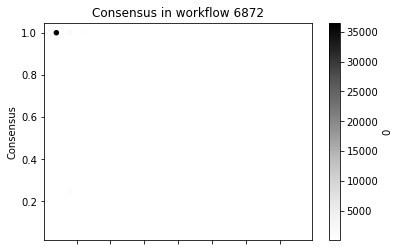

In [21]:
for workflow_id, consensus in workflow_consensus.items():
    pandas.DataFrame(consensus).value_counts().to_frame().reset_index().plot.scatter(
        title='Consensus in workflow {}'.format(workflow_id),
        x='Classification Count',
        y='Consensus',
        c=0,
    )

In [13]:
from IPython.display import display
for workflow_id, consensus in workflow_consensus.items():
    display(pandas.DataFrame(consensus).value_counts().to_frame().reset_index())

,Classification Count,Consensus,0
0,1,1.000000,96929
1,2,1.000000,14319
2,3,1.000000,3400
3,2,0.250000,3020
4,3,0.333333,481
5,4,1.000000,92
6,5,1.000000,12
7,4,0.375000,11
8,12,0.458333,3
9,6,1.000000,3


,Classification Count,Consensus,0
0,1,1.000000,258446
1,3,1.000000,99081
2,2,1.000000,56971
3,4,0.375000,40310
4,2,0.250000,36256
...,...,...,...
70,9,0.333333,1
71,9,0.277778,1
72,9,0.185185,1
73,8,0.075000,1


,Classification Count,Consensus,0
0,1,1.000000,36505
1,2,1.000000,1710
2,2,0.250000,857
3,3,1.000000,327
4,3,0.333333,243
5,4,1.000000,67
6,3,0.111111,43
7,4,0.375000,35
8,4,0.166667,17
9,5,0.400000,10
